In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from time import time

# 1. BS Model

### 1.1 Including r,q
- d1, d2 
- $\Delta$
- $\nu$
- $\Gamma$
- Call & Put Price

In [ ]:
def BMS_d1(S, K, r, q, sigma, tau):
    ''' Computes d1 for the Black Merton Scholes formula '''
    d1 = 1.0*(np.log(1.0 * S/K) + (r - q + sigma**2/2) * tau) / (sigma * np.sqrt(tau))
    return d1

def BMS_d2(S, K, r, q, sigma, tau):
    ''' Computes d2 for the Black Merton Scholes formula '''
    d2 = 1.0*(np.log(1.0 * S/K) + (r - q - sigma**2/2) * tau) / (sigma * np.sqrt(tau))
    return d2

def BMS_price(type_option, S, K, r, q, sigma, T, t=0):
    ''' Computes the Black Merton Scholes price for a 'call' or 'put' option '''
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    d2 = BMS_d2(S, K, r, q, sigma, tau)
    if type_option == 'call':
        price = S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    elif type_option == 'put':
        price = K * np.exp(-r * tau) * norm.cdf(-d2) - S * np.exp(-q * tau) * norm.cdf(-d1) 
    return price

def BMS_delta(type_option, S, K, r, q, sigma, T, t=0):
    ''' Computes the delta for a call or a put. '''
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    if type_option == 'call':
        delta = np.exp(-q * tau) * norm.cdf(d1)
    elif type_option == 'put':
        delta = np.exp(-q * tau) * (norm.cdf(d1) - 1)
    return delta

def BMS_vega(S, K, r, q, sigma, T, t=0):
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    vega = S*np.sqrt(tau)*np.exp(-q*tau)*norm.pdf(d1)
    return vega

def BMS_gamma(S, K, r, q, sigma, T, t=0):
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    gamma = np.exp(-q*tau)*norm.pdf(d1)/(S*sig*np.sqrt(tau))
    return gamma

### 1.2 Excluding r,q
- call & put price
- $\nu$
- $\Delta$
- $\Gamma$
- Implied Vol ($\sigma_{IV}$)

In [33]:
def bs_call(S_o, K, r, T, sigma):
    d1 = (np.log(S_o/K) + ((r+(sigma**2)*0.5)*T))/(sigma*np.sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    c = (S_o*norm.cdf(d1)) - (K*np.exp(-1*r*T)*norm.cdf(d2))
    return c

def bs_put(S_o, K, r, T, sigma):
    d1 = (np.log(S_o/K) + ((r+(sigma**2)*0.5)*T))/(sigma*np.sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    p = -(S_o*norm.cdf(-d1)) + (K*np.exp(-1*r*T)*norm.cdf(-d2))
    return p

def bs_vega(S_o, K, r, T, sigma):
    d1 = (np.log(S_o/K) + ((r+(sigma**2)*0.5)*T))/(sigma*np.sqrt(T))
    vega = S_o * norm.pdf(d1) * np.sqrt(T)
    return vega

def bs_delta(S_o, K, r, T, sigma):
    d1 = (np.log(S_o/K) + ((r+(sigma**2)*0.5)*T))/(sigma*np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

def get_implied_vol(S_o, K, r, T, c, initial_sigma = 0.1, threshold = 0.0001,max_iterations=1000):
    sigma = initial_sigma
    for i in range(max_iterations):
        print("sigma: ",sigma)
        calculated_call = bs_call(S_o, K, r, T, sigma)
        print(calculated_call)
        vega = bs_vega(S_o, K, r, T, sigma)
        print("vega: ",vega)
        diff = c - calculated_call
        if abs(diff)<threshold:
            return sigma
        sigma=sigma+diff/vega
#     print("maximum iterations used")
    return sigma

In [34]:
Unnamed: 0                              1
today                 2023-10-07 09:31:00
expiration            2023-07-14 00:00:00
strike                               80.0
optionType                              C
spot                               132.04
riskFreeRate                         0.05
optionPremiumPrice              52.088916

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3218962375.py, line 2)

In [46]:
val = get_implied_vol(132.04, 80, 0.05, 0.23, 53, initial_sigma = 0.1, threshold = 0.0001,max_iterations=1000)

sigma:  0.1
52.95473022016695
vega:  3.0592407283405425e-24
sigma:  1.4797717425004736e+22
132.04
vega:  0.0
sigma:  -inf
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan
sigma:  nan
nan
vega:  nan

C:\Users\anshu\AppData\Local\Temp\ipykernel_14040\4178609398.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  sigma=sigma+diff/vega
C:\Users\anshu\AppData\Local\Temp\ipykernel_14040\4178609398.py:2: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S_o/K) + ((r+(sigma**2)*0.5)*T))/(sigma*np.sqrt(T))
C:\Users\anshu\AppData\Local\Temp\ipykernel_14040\4178609398.py:14: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S_o/K) + ((r+(sigma**2)*0.5)*T))/(sigma*np.sqrt(T))


In [47]:
val

nan

# 2. Call Price = $\Delta$ Hedging

In [26]:
def delta_neutral(type_, spot, K, r, q, sig, maturity, n_sim):
    """
    Simulates a delta-neutral hedging strategy for calls and puts
    """
    assert type_ in ["call", "put"]
    # final cash at end of simulation
    synthetic_opt = np.zeros(n_sim)

    # current wall clock time
    st = time()

    # run n_sim paths
    for j in range(n_sim):
        # reset for each path
        # current price
        S = spot
        # time left
        T = maturity
        # delta from last period (also how much stock we own at the start of the period)
        delta_prev = 0.0

        for i in range(m):
            # compute delta of the option with the BMS calculator
            delta = BMS_delta(type_, S, K, r, q, sig, T)

            # we buy (delta-delta_prev) of stock to maintain exactly delta of stock
            synthetic_opt[j] += (delta - delta_prev)*S * np.exp(-(r-q)*i*dt)

            delta_prev = delta

            # simulate path of stock price
            z = np.random.randn()
            S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z)

            T = T - dt

        if type_ == "call":
            synthetic_opt[j] += (-delta*S*np.exp(-(r-q)*maturity) + np.maximum(S-K,0)*np.exp(-r*maturity))
        else:
            synthetic_opt[j] += (-delta*S*np.exp(-(r-q)*maturity) + np.maximum(K-S,0)*np.exp(-r*maturity))

    et = time()
    print('Elapsed time is %s seconds.' % str(et - st))
    return synthetic_opt

### 2.1 Parameters

In [27]:
spot = 100
K = 110
r = 0.12
q = 0.03
sig = 0.22

maturity = 1

m = 365
dt = maturity/m

n_sim = 2000

### 2.2 Call Option

Cost of delta hedging in Black-Merton-Scholes (BMS) Model (Call) when r,q>0

In [16]:
synthetic_C = delta_neutral("call", spot, K, r, q, sig, maturity, n_sim)
C = BMS_price('call', spot, K, r, q, sig, maturity)
print('C = ' + str(C))
print('mean_synthetic_C = ' + str(np.mean(synthetic_C)))
print('std_synthetic_C = ' + str(np.std(synthetic_C, ddof=1)))

Elapsed time is 223.94891333580017 seconds.
C = 8.266947140745302
mean_synthetic_C = 8.281386971748017
std_synthetic_C = 0.4678843393513983


### 2.3 Put Option

Cost of delta hedging in Black-Merton-Scholes (BMS) Model (Put) when r,q>0

In [17]:
synthetic_P = delta_neutral("put", spot, K, r, q, sig, maturity, n_sim)
P = BMS_price('put', spot, K, r, q, sig, maturity)
print('P = ' + str(P))
print('mean_synthetic_P = ' + str(np.mean(synthetic_P)))
print('std_synthetic_P = ' + str(np.std(synthetic_P, ddof=1)))

Elapsed time is 98.65230917930603 seconds.
P = 8.78364182478181
mean_synthetic_P = 8.766849957101602
std_synthetic_P = 0.4401455043011563


### 2.4 Non Constant Volatility

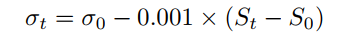

In [18]:
sig_0 = sig
synthetic_P_ncvol = np.zeros(n_sim)

st = time()

for j in range(n_sim):
    # reset for each path
    S = spot
    T = maturity
    delta_prev = 0.0
    sig_t = sig_0

    for i in range(m):
        delta = BMS_delta("call", S, K, r, q, sig, T)
        synthetic_P_ncvol[j] += (delta - delta_prev)*S * np.exp(-(r-q)*i*dt)
        delta_prev = delta

        z = np.random.randn()
        S = S * np.exp((r - q - sig_t*sig_t/2)*dt + sig_t*np.sqrt(dt)*z)

        T = T - dt
        sig_t = sig_0-0.001*(S-spot)

    synthetic_P_ncvol[j] += (-delta*S*np.exp(-(r-q)*maturity) + np.maximum(S-K,0)*np.exp(-r*maturity))

et = time()
print('Elapsed time is %s seconds.' % str(et - st))
print('mean_synthetic_P_ncvol = ' + str(np.mean(synthetic_P_ncvol)))
print('std_synthetic_P_ncvol = ' + str(np.std(synthetic_P_ncvol, ddof=1)))

Elapsed time is 68.80033922195435 seconds.
mean_synthetic_P_ncvol = 8.074729527282377
std_synthetic_P_ncvol = 0.5280700068562022
